In [64]:
# Import libraries and figure configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['figure.dpi'] = 120
sns.set_palette("husl")
plt.style.use('seaborn-v0_8')

In [65]:
# Load dataset
df = pd.read_csv("FoAI_A2_data_4.6k.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,EX,FT,Data Scientist,300000,USD,300000,US,100,US,L
1,2020,MI,FT,Machine Learning Infrastructure Engineer,44000,EUR,50180,PT,0,PT,M
2,2020,MI,FT,Lead Data Analyst,87000,USD,87000,US,100,US,L
3,2020,MI,FT,Data Engineer,88000,GBP,112872,GB,50,GB,L
4,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S


In [66]:
# Data Cleaning & Preprocessing
df = df[['work_year', 'experience_level', 'employment_type', 'job_title',
         'salary_in_usd', 'employee_residence', 'remote_ratio',
         'company_location', 'company_size']].copy()

df['experience_level'] = pd.Categorical(df['experience_level'],
                                        categories=['EN','MI','SE','EX'],
                                        ordered=True)

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           4644 non-null   int64   
 1   experience_level    4644 non-null   category
 2   employment_type     4644 non-null   object  
 3   job_title           4644 non-null   object  
 4   salary_in_usd       4644 non-null   int64   
 5   employee_residence  4644 non-null   object  
 6   remote_ratio        4644 non-null   int64   
 7   company_location    4644 non-null   object  
 8   company_size        4644 non-null   object  
dtypes: category(1), int64(3), object(5)
memory usage: 295.1+ KB


work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [67]:
# Basic Statistic & Summary
df.describe().round(2)

,work_year,salary_in_usd,remote_ratio
count,4644.00,4644.00,4644.00
mean,2023.60,148308.59,30.44
std,1.29,71866.70,45.23
min,2020.00,15000.00,0.00
25%,2023.00,99100.00,0.00
50%,2024.00,140000.00,0.00
75%,2025.00,185000.00,100.00
max,2025.00,750000.00,100.00


In [68]:
df.groupby(['work_year', 'experience_level'])['salary_in_usd'].median().unstack()

experience_level,EN,MI,SE,EX
work_year,,,,
2020,51321.0,79833.0,120000.0,189916.5
2021,61915.5,75000.0,120000.0,151833.5
2022,80000.0,97956.0,141525.0,200000.0
2023,79350.0,112000.0,159100.0,218000.0
2024,93100.0,135000.0,167000.0,188625.0
2025,82000.0,130000.0,154000.0,196250.0


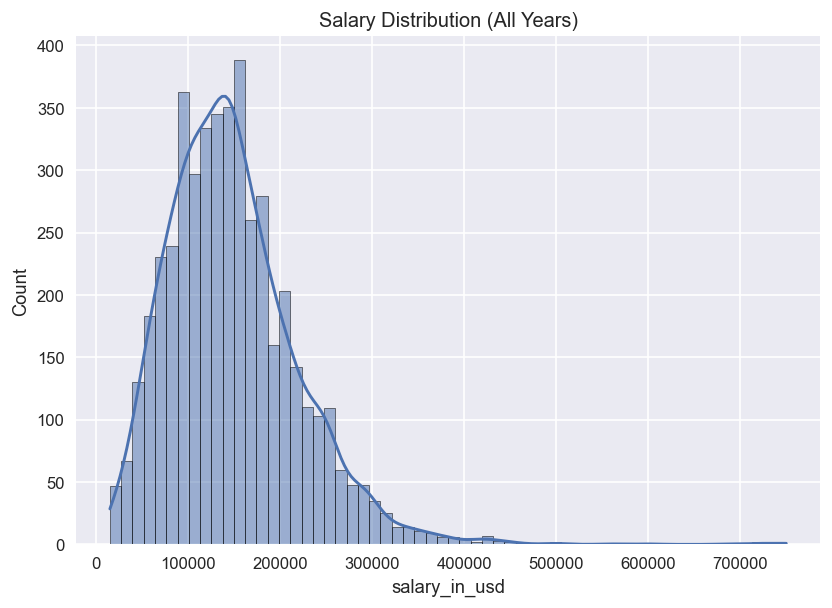

In [69]:
#Visualization 1: Salary Distribution
plt.figure()
sns.histplot(df['salary_in_usd'], bins=60, kde=True)
plt.title("Salary Distribution (All Years)")
plt.show()

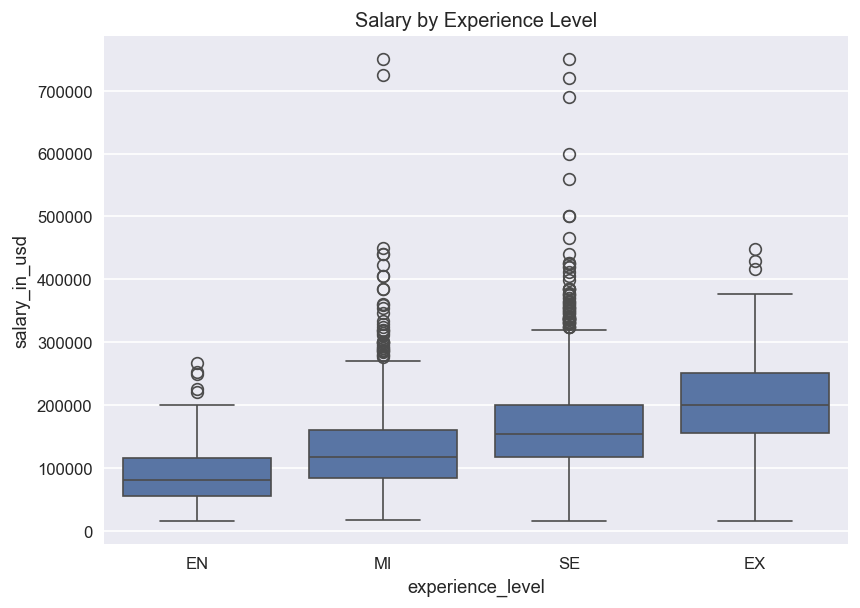

In [70]:
#Visualization 2: Salary by Experience Level
plt.figure()
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title("Salary by Experience Level")
plt.show()

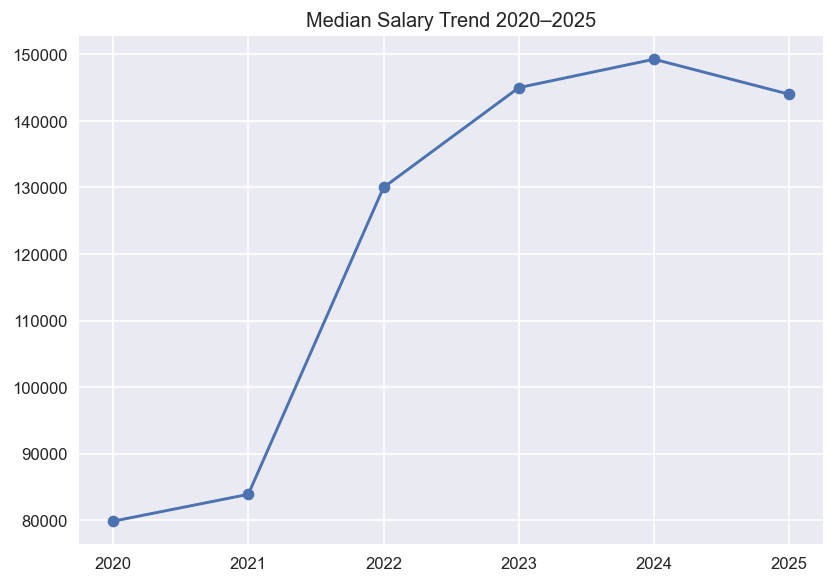

In [71]:
#Visualization 3: Salary Trend Over Years
yearly = df.groupby('work_year')['salary_in_usd'].median()
plt.figure()
plt.plot(yearly.index, yearly.values, marker='o')
plt.title("Median Salary Trend 2020–2025")
plt.show()

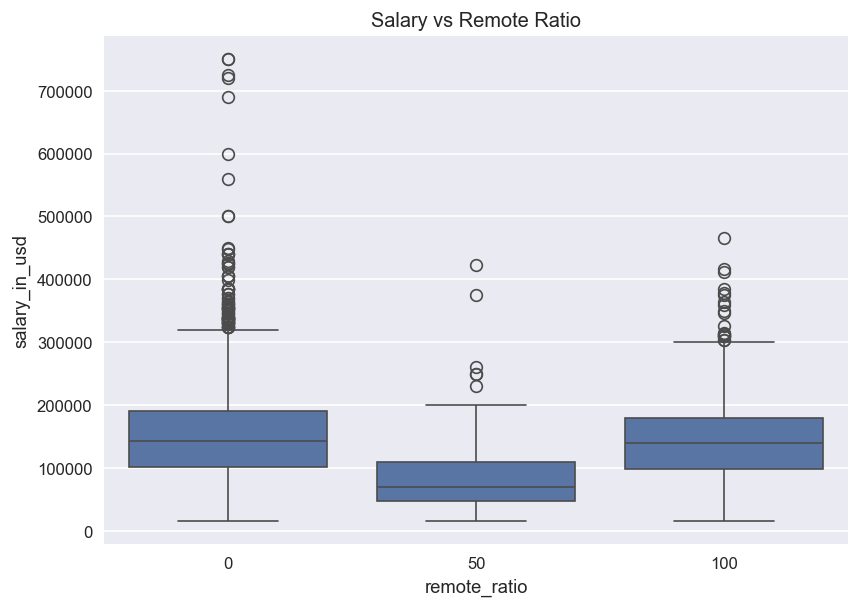

In [72]:
#Visualization 4: Remote vs Onsite
plt.figure()
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title("Salary vs Remote Ratio")
plt.show()

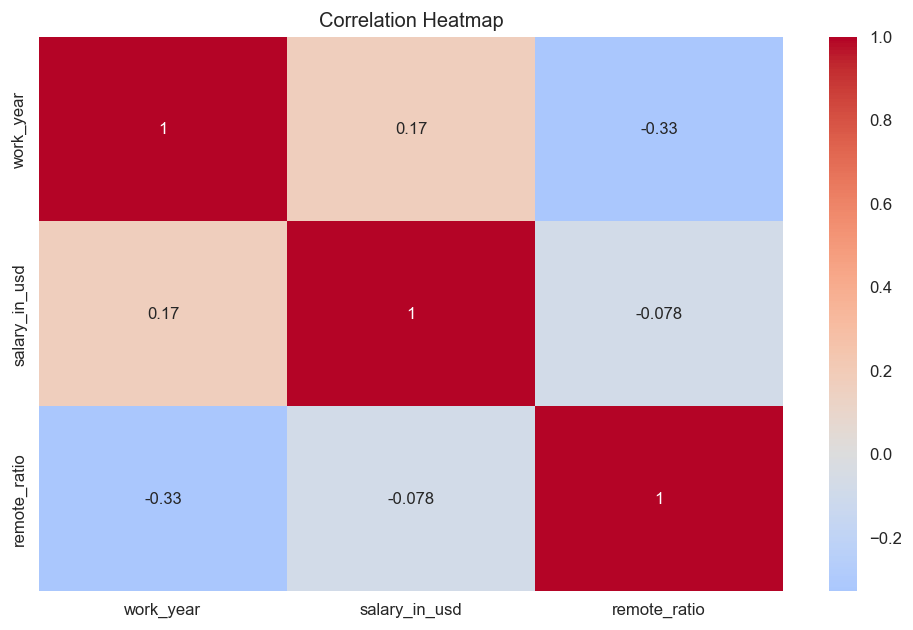

In [73]:
#Visualization 5: Correlation Heatmap
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [74]:
#Machine Learning Model - Predict Salary - Linear Regression / Random Forest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = df.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include=np.number).columns

preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
])

model = Pipeline([
    ('prep', preprocess),
    ('lr', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
mae


44009.674730402985